# Perceptron

## 파이썬으로 간단하게 구현한 퍼셉트론-1

In [21]:
import numpy as np
X=np.array([1,0,1])
X

array([1, 0, 1])

In [22]:
W=np.array([
    -0.5,
    1.0,
    1.0
])
W

array([-0.5,  1. ,  1. ])

In [23]:
y=sum(X*W)
y

0.5

## 파이썬으로 간단하게 구현한 퍼셉트론-2

In [24]:
import numpy as np
X=np.array([
            [1,0,0],
            [1,0,1],
            [1,1,0],
            [1,1,1]
])
X

array([[1, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [25]:
W=np.array([
    -0.5,
    1.0,
    1.0
])
W

array([-0.5,  1. ,  1. ])

In [26]:
y=np.sum(X*W, axis=1)
y

array([-0.5,  0.5,  0.5,  1.5])

## SLP를 통한 AND, OR, NOT 게이트 문제

### 퍼셉트론 구현하기

In [27]:
import numpy as np
def ANDperceptron(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

inputData = np.array([[0,0],[0,1],[1,0],[1,1]])

print("+++ AND Perceptron +++")
for xs in inputData:
    print(str(xs) + " >>> " + str(ANDperceptron(xs[0], xs[1])))

+++ AND Perceptron +++
[0 0] >>> 0
[0 1] >>> 0
[1 0] >>> 0
[1 1] >>> 1


In [28]:
import numpy as np
def ANDperceptron(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

inputData = np.array([[0,0],[0,1],[1,0],[1,1]])

print("+++ AND Perceptron +++")

for xs in inputData:
    print(str(xs) + " >>> " + str(ANDperceptron(xs[0], xs[1])))

+++ AND Perceptron +++
[0 0] >>> 0
[0 1] >>> 0
[1 0] >>> 0
[1 1] >>> 1


In [29]:
import numpy as np

#데이터 생성
rng = np.random.RandomState(123)
d = 2
N = 10
mean = 5
x1 = rng.randn(N, d) + np.array([0, 0])
x2 = rng.randn(N, d) + np.array([mean, mean])
x = np.concatenate((x1, x2), axis=0)

#단순 퍼셉트론
w = np.zeros(d)
b = 0

def y(x):
    return step(np.dot(w, x) + b)

def step(x):
    return 1 * (x > 0)

def t(i):
    if i < N:
        return 0
    else:
        return 1

while True:
    classified = True
    for i in range(N * 2):
        delta_w = (t(i) - y(x[i])) * x[i]
        delta_b = (t(i) - y(x[i]))
        w += delta_w
        b += delta_b
        classified *= all(delta_w == 0) * (delta_b == 0)
    if classified:
        break

print('w:', w)
print('b:', b)
print('\nTest:')
print(y([0, 0]))  # => 0
print(y([5, 5]))  # => 1

w: [2.14037745 1.2763927 ]
b: -9

Test:
0
1


### AND 게이트 단순 퍼셉트론 구현하기

In [30]:
import numpy as np

# AND 데이터 만들기

X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([0, 0, 0, 1])

# 1단계 : 가중치 초기화

w = np.zeros(1 + X.shape[1])

# 최초 분류

input_signal = np.dot(X, w[1:]) + w[0]
def out_put(X):
    return np.where(X >= 0.0, 1, 0)
pred_y = out_put(input_signal)
print(pred_y)

# 가중치 최적화 시작

errors = []
epoch = 100
for time in range(0, epoch):
    print("{0}번째 반복 입니다".format(time))
    eta = 0.01
    idx = 0
    for xi, target in zip(X, y):
        updated_w = eta * (target - pred_y[idx])
        w[1:] += updated_w * xi
        w[0] += updated_w
        idx += 1
    input_signal = np.dot(X, w[1:]) + w[0]
    pred_y = out_put(input_signal)
    errors.append(((y - pred_y).sum()) / 100)
    print(((y - pred_y).sum()) / 100)
    if ((y - pred_y).sum()) / 100 == 0:
        break

print(pred_y)

[1 1 1 1]
0번째 반복 입니다
0.01
1번째 반복 입니다
0.01
2번째 반복 입니다
-0.02
3번째 반복 입니다
0.01
4번째 반복 입니다
0.0
[0 0 0 1]


### OR

In [31]:
import numpy as np

# OR 데이터 만들기
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([0, 1, 1, 1])

# 1단계 : 가중치 초기화
w = np.zeros(1 + X.shape[1])

# 최초 분류
input_signal = np.dot(X, w[1:]) + w[0]

def out_put(X):
    return np.where(X >= 0.0, 1, 0)

pred_y = out_put(input_signal)
print(pred_y)

# 가중치 최적화 시작
errors = []
epoch = 100
for time in range(0, epoch):
    print("{0}번째 반복 입니다".format(time))
    eta = 0.01
    idx = 0
    for xi, target in zip(X, y):
        updated_w = eta * (target - pred_y[idx])
        w[1:] += updated_w * xi
        w[0] += updated_w
        idx += 1
    input_signal = np.dot(X, w[1:]) + w[0]
    pred_y = out_put(input_signal)
    errors.append(((y - pred_y).sum()) / 100)
    print(((y - pred_y).sum()) / 100)
    if ((y - pred_y).sum()) / 100 == 0:
        break
print(pred_y)

[1 1 1 1]
0번째 반복 입니다
0.03
1번째 반복 입니다
-0.01
2번째 반복 입니다
-0.01
3번째 반복 입니다
-0.01
4번째 반복 입니다
0.0
[0 1 1 1]


### NAND 게이트 단순 퍼셉트론 화

In [32]:
import numpy as np

# NAND 데이터 만들기
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([1, 0, 0, 0])

# 1단계 : 가중치 초기화
w = np.zeros(1 + X.shape[1])

# 최초 분류
input_signal = np.dot(X, w[1:]) + w[0]

def out_put(X):
    return np.where(X >= 0.0, 1, 0)

pred_y = out_put(input_signal)
print(pred_y)

# 가중치 최적화 시작
errors = []
epoch = 100
for time in range(0, epoch):
    print("{0}번째 반복 입니다".format(time))
    eta = 0.01
    idx = 0
    for xi, target in zip(X, y):
        updated_w = eta * (target - pred_y[idx])
        w[1:] += updated_w * xi
        w[0] += updated_w
        idx += 1
    input_signal = np.dot(X, w[1:]) + w[0]
    pred_y = out_put(input_signal)
    errors.append(((y - pred_y).sum()) / 100)
    print(((y - pred_y).sum()) / 100)
    if ((y - pred_y).sum()) / 100 == 0:
        break
print(pred_y)

[1 1 1 1]
0번째 반복 입니다
0.01
1번째 반복 입니다
0.01
2번째 반복 입니다
0.01
3번째 반복 입니다
0.0
[1 0 0 0]


### Quiz- NOR  게이트 단순 퍼셉트론

In [33]:
import numpy as np

# Quiz- NOR 데이터 만들기
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([1, 1, 1, 0])

# 1단계 : 가중치 초기화
w = np.zeros(1 + X.shape[1])

# 최초 분류
input_signal = np.dot(X, w[1:]) + w[0]

def out_put(X):
    return np.where(X >= 0.0, 1, 0)

pred_y = out_put(input_signal)
print(pred_y)

# 가중치 최적화 시작
errors = []
epoch = 100
for time in range(0, epoch):
    print("{0}번째 반복 입니다".format(time))
    eta = 0.01
    idx = 0
    for xi, target in zip(X, y):
        updated_w = eta * (target - pred_y[idx])
        w[1:] += updated_w * xi
        w[0] += updated_w
        idx += 1
    input_signal = np.dot(X, w[1:]) + w[0]
    pred_y = out_put(input_signal)
    errors.append(((y - pred_y).sum()) / 100)
    print(((y - pred_y).sum()) / 100)
    if ((y - pred_y).sum()) / 100 == 0:
        break
print(pred_y)

[1 1 1 1]
0번째 반복 입니다
0.03
1번째 반복 입니다
-0.01
2번째 반복 입니다
0.0
[1 1 1 0]


### XOR 게이트 구현하기

In [34]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1


def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [35]:
import numpy as np

print(XOR(0,0))
print(XOR(1,0))
print(XOR(0,1))
print(XOR(1,1))

0
1
1
0


# XOR 문제를 MLP로 풀어보기

## 파이썬 버전

In [36]:
# 1. 패키지 로드
import numpy as np

# 2. MLP 구조 구성하는 게이트 클래스 구현
def sigmoid(x):
  return 1/(1+np.exp(-x))
def numerical_derivative(f, x):
  delta_x = 1e-4
  grad = np.zeros_like(x)
  it=np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:
    idx=it.multi_index
    tmp_val=x[idx]
    x[idx]=float(tmp_val) + delta_x
    fx1 = f(x)
    x[idx]=float(tmp_val) - delta_x
    fx2 = f(x)
    grad[idx]=(fx1 - fx2) / (2*delta_x)
    x[idx]=tmp_val
    it.iternext()
  return grad


class LogicGate:
  def __init__(self, gate_name, xdata, tdata):
    self.name=gate_name
    self.__xdata=xdata.reshape(4,2)
    self.__tdata=tdata.reshape(4,1)
    self.__w=np.random.rand(2,1)
    self.__b=np.random.rand(1)
    self.__learning_rate=1e-2
  # 손실 함수
  def __loss_function(self):
    delta=1e-7
    z=np.dot(self.__xdata, self.__w) + self.__b
    y=sigmoid(z)
    return -np.sum(self.__tdata*np.log(y+delta) + (1-self.__tdata)*np.log((1-y)+delta))
  # 손실 값 계산 함수
  def error_val(self):
    return self.__loss_function()


#학습
  def train(self):
    #손실함수 계산
    f=lambda x: self.__loss_function()
    print("초기 에러 값 = ", self.error_val())
    #손실함수에 대해 경사하강 가중치, 바이어스 업데이트
    for step in range(8001):
      self.__w -= self.__learning_rate * numerical_derivative(f, self.__w)
      self.__b -= self.__learning_rate * numerical_derivative(f, self.__b)
      if(step %400==0):
        print("step = ",step, "에러 값 = ", self.error_val())
  #예측 함수
  def predict(self, input_data):
    z=np.dot(input_data, self.__w) + self.__b
    y=sigmoid(z)
    if y > 0.5:
      result = 1
    else:
      result = 0
    return y, result


# AND
xdata=np.array([[0,0],[0,1],[1,0],[1,1]])
tdata=np.array([0,0,0,1])
AND_g=LogicGate("AND_GATE", xdata, tdata)
AND_g.train()
print(AND_g.name, '\n')
test_data=np.array([[0,0],[0,1],[1,0],[1,1]])
for input_data in test_data:
  (sigmoid_val, logical_val)=AND_g.predict(input_data)
  print(input_data, "=", logical_val, "\n")



# NAND
xdata=np.array([[0,0],[0,1],[1,0],[1,1]])
tdata=np.array([1,1,1,0])
NAND_g=LogicGate("NAND_GATE", xdata, tdata)
NAND_g.train()
print(NAND_g.name, '\n')
test_data=np.array([[0,0],[0,1],[1,0],[1,1]])
for input_data in test_data:
  (sigmoid_val, logical_val)=NAND_g.predict(input_data)
  print(input_data, "=", logical_val, "\n")



# OR
xdata=np.array([[0,0],[0,1],[1,0],[1,1]])
tdata=np.array([0,1,1,1])
OR_g=LogicGate("OR_GATE", xdata, tdata)
OR_g.train()
print(OR_g.name, '\n')
test_data=np.array([[0,0],[0,1],[1,0],[1,1]])
for input_data in test_data:
  (sigmoid_val, logical_val)=OR_g.predict(input_data)
  print(input_data, "=", logical_val, "\n")



# XOR 계산하기
input_data=np.array([[0,0],[0,1],[1,0],[1,1]])
s1=[] #NAND
s2=[] #OR
new_input_data=[] #AND 입력
final_output=[] #AND 출력
for index in range(len(input_data)):
  s1=NAND_g.predict(input_data[index])
  s2=OR_g.predict(input_data[index])
  new_input_data.append(s1[-1])
  new_input_data.append(s2[-1])
  (sigmoid_val, logical_val)=AND_g.predict(np.array(new_input_data))
  final_output.append(logical_val)
  new_input_data=[] #AND 입력 초기화
for index in range(len(input_data)):
  print(input_data[index], "=", final_output[index], end='')
  print('\n')

초기 에러 값 =  3.0364465419410878
step =  0 에러 값 =  3.0111874305131083
step =  400 에러 값 =  1.4779923982290848
step =  800 에러 값 =  1.1111397893581216
step =  1200 에러 값 =  0.8987485649433992
step =  1600 에러 값 =  0.7569263139832219
step =  2000 에러 값 =  0.6542587512812378
step =  2400 에러 값 =  0.5760396746860992
step =  2800 에러 값 =  0.5142996831644823
step =  3200 에러 값 =  0.4642717243941455
step =  3600 에러 값 =  0.4228981412902694
step =  4000 에러 값 =  0.38811392685071755
step =  4400 에러 값 =  0.3584681177420513
step =  4800 에러 값 =  0.33290863033400797
step =  5200 에러 값 =  0.3106527706289026
step =  5600 에러 값 =  0.2911056432907345
step =  6000 에러 값 =  0.27380677475877724
step =  6400 에러 값 =  0.2583940846483088
step =  6800 에러 값 =  0.24457891427851552
step =  7200 에러 값 =  0.2321283205423006
step =  7600 에러 값 =  0.22085227024683007
step =  8000 에러 값 =  0.21059421591608218
AND_GATE 

[0 0] = 0 

[0 1] = 0 

[1 0] = 0 

[1 1] = 1 

초기 에러 값 =  2.581544367356249
step =  0 에러 값 =  2.5744128904084977
step

## 딥러닝 버전

In [37]:
import numpy as np

# 시그모이드 구하는 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 수치 미분 함수
def numerical_derivative(f, input_data):
    delta_x = 1e-4
    ret = np.zeros_like(input_data)
    it = np.nditer(input_data, flags=['multi_index'])
    while not it.finished:
        idx = it.multi_index
        tmp = input_data[idx]
        input_data[idx] = float(tmp) + delta_x
        fx1 = f(input_data)
        input_data[idx] = float(tmp) - delta_x
        fx2 = f(input_data)
        ret[idx] = (fx1 - fx2) / (2 * delta_x)
        input_data[idx] = tmp
        it.iternext()
    return ret

class LogicGate:
    def __init__(self, gate_name, x_data, t_data):
        self.name = gate_name
        # 입력 데이터
        self.__x_data = x_data
        self.__t_data = t_data
        # 임의의 W2, b2, W3, b3 준비
        self.__W2 = np.random.rand(2, 6)
        self.__b2 = np.random.rand(6)
        self.__W3 = np.random.rand(6, 1)
        self.__b3 = np.random.rand(1)
        self.__learning_rate = 1e-1
        self.loss_func = self.__feed_forward
    
    # feed_forward 함수로, 에러를 찾아줌
    def __feed_forward(self):
        delta = 1e-7
        # 입력층 -> 은닉층
        z2 = np.dot(self.__x_data, self.__W2) + self.__b2
        a2 = sigmoid(z2)
        # 은닉층 -> 출력층
        z3 = np.dot(a2, self.__W3) + self.__b3
        y = sigmoid(z3)
        # 크로스 엔트로피로 에러를 측정
        return -np.sum(self.__t_data * np.log(y + delta) + (1 - self.__t_data) * np.log(1 - y + delta))
    
    def train(self):
        f = lambda x: self.__feed_forward()
        print("Initial W2 = ", self.__W2, "b2 = ", self.__b2, "W3 = ", self.__W3, "b3 = ", self.__b3, "error_val = ", self.loss_func())
        for step in range(8001):
            self.__W2 -= self.__learning_rate * numerical_derivative(f, self.__W2)
            self.__b2 -= self.__learning_rate * numerical_derivative(f, self.__b2)
            self.__W3 -= self.__learning_rate * numerical_derivative(f, self.__W3)
            self.__b3 -= self.__learning_rate * numerical_derivative(f, self.__b3)
            if step % 400 == 0:
                print("step = ", step, "W2 = ", self.__W2, "b2 = ", self.__b2, "W3 = ", self.__W3, "b3 = ", self.__b3, "error_val = ", self.loss_func())
                
    def predict(self, x_data):
        z2 = np.dot(x_data, self.__W2) + self.__b2
        a2 = sigmoid(z2)
        z3 = np.dot(a2, self.__W3) + self.__b3
        pro = sigmoid(z3)
        if pro < 0.5:
            return 0, pro
        return 1, pro

# XOR 데이터
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).reshape([4, 2])
y_data = np.array([0, 1, 1, 0]).reshape([4, 1])

# 학습
XOR_Gate = LogicGate("XOR_Gate", x_data, y_data)
XOR_Gate.train()

# 출력
print(XOR_Gate.predict([0, 0]))
print(XOR_Gate.predict([1, 0]))
print(XOR_Gate.predict([0, 1]))
print(XOR_Gate.predict([1, 1]))

Initial W2 =  [[0.30159257 0.73815212 0.93944769 0.70191101 0.55673302 0.72997733]
 [0.66632919 0.21386616 0.28700741 0.21237116 0.40779922 0.37792162]] b2 =  [0.27241897 0.58110865 0.28675977 0.4732978  0.97929777 0.60731609] W3 =  [[0.5981236 ]
 [0.40559573]
 [0.0980292 ]
 [0.59216488]
 [0.14699416]
 [0.46581696]] b3 =  [0.52085068] error_val =  4.777787895878026
step =  0 W2 =  [[0.29337677 0.73337271 0.93828409 0.69425955 0.55546301 0.72519699]
 [0.6580575  0.20935038 0.28591575 0.20507855 0.40657009 0.3733718 ]] b2 =  [0.25255225 0.56905056 0.28373112 0.45470913 0.97571956 0.59416835] W3 =  [[ 0.49214866]
 [ 0.28959877]
 [-0.01258957]
 [ 0.4802196 ]
 [ 0.01986544]
 [ 0.34744515]] b3 =  [0.38446898] error_val =  3.8391622078324037
step =  400 W2 =  [[ 0.64158354  0.73014716  0.90593296  0.82613148  0.41770606  0.89164499]
 [ 0.84665231  0.2111094  -0.0701875   0.48820758  0.18976303  0.6352828 ]] b2 =  [0.30911375 0.55622097 0.28415328 0.46089419 0.99632731 0.59271744] W3 =  [[ 0.4

In [38]:
# 패키지 임포트
import numpy as np

# 학습 데이터 셋 생성
X=np.array(
    [1,2,3,4,5]
).reshape(5,1)
X


y=np.array(
    [2,3,4,5,6]
).reshape(5,1)
y

# W,b 초기화
W=np.random.rand(1,1)
b=np.random.rand(1)
print(
    "W=",W,
    ",W.shape",W.shape,
    ",b=",b,
    ",b.shape",b.shape
)

# 손실함수 정의
def loss_func(x, t):
  # H(x)를 정의 - 행렬 계산
  y=np.dot(x,W)+b
  return np.sum((t - y)**2) /len(x)

# 수치미분 함수 정의
def numerical_derivative(fx, input_list):
  delta_x=1e-4 # 1* 0.00001
  ret=np.zeros_like(input_list)
  it=np.nditer(input_list, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:
    i=it.multi_index
    tmp=input_list[i]
    input_list[i]=float(tmp) - delta_x
    f1=fx(input_list)
    input_list[i]=float(tmp) + delta_x
    f2=fx(input_list)
    ret[i]=(f2-f1) / (delta_x*2)
    input_list[i]=tmp
    it.iternext()
  return ret


# 손실함수 계산- 에러 값 계산
def error_val(x, t):
  # H(x)를 정의 - 행렬 계산
  y=np.dot(x,W)+b
  return np.sum((t - y)**2) /len(x)


# W,b 업데이트 수행 - 학습
#학습율
learning_rate=1e-2
f = lambda x: loss_func(X, y)
print(
    "초기 에러 값 =", error_val(X,y),
    "초기 W 값 =",W,
    "초기 b 값 =",b
)
for step in range(10001):
  # W,b 를 경사하강으로 업데이트
  W -= numerical_derivative(f,W) * learning_rate
  b -= numerical_derivative(f,b) * learning_rate
  if step % 500 == 0:
    print(
        "step = ", step,
        "에러 값 =", error_val(X,y),
        "W 값 =",W,
        "b 값 =",b
    )


# 학습된 결과로 현장 적용 후 예측 함수 정의
def predict(x):
  y=np.dot(x,W)+b
  return y

predict(47)

W= [[0.25914185]] ,W.shape (1, 1) ,b= [0.53263988] ,b.shape (1,)
초기 에러 값 = 8.33348949673567 초기 W 값 = [[0.25914185]] 초기 b 값 = [0.53263988]
step =  0 에러 값 = 4.90819828216339 W 값 = [[0.45017225]] b 값 = [0.57497675]
step =  500 에러 값 = 0.00048721858655564193 W 값 = [[1.01433371]] b 값 = [0.94826342]
step =  1000 에러 값 = 1.5624279451355754e-05 W 값 = [[1.00256683]] b 값 = [0.99073521]
step =  1500 에러 값 = 5.01044326119848e-07 W 값 = [[1.00045966]] b 값 = [0.9983409]
step =  2000 에러 값 = 1.6067647632592755e-08 W 값 = [[1.00008231]] b 값 = [0.99970289]
step =  2500 에러 값 = 5.152623969330119e-10 W 값 = [[1.00001474]] b 값 = [0.9999468]
step =  3000 에러 값 = 1.6523597217978548e-11 W 값 = [[1.00000264]] b 값 = [0.99999047]
step =  3500 에러 값 = 5.298839324585692e-13 W 값 = [[1.00000047]] b 값 = [0.99999829]
step =  4000 에러 값 = 1.6992485290923388e-14 W 값 = [[1.00000008]] b 값 = [0.99999969]
step =  4500 에러 값 = 5.449203919061008e-16 W 값 = [[1.00000002]] b 값 = [0.99999995]
step =  5000 에러 값 = 1.7474678352868696e-17 W 값 = 

array([[48.]])

# deep learning

## 텐서플로  익히기

In [39]:
import tensorflow as tf
with tf.compat.v1.Session() as sess:
   helloworld = tf.constant("Hello World!")
   print(sess.run(helloworld))

b'Hello World!'


# 딥러닝

In [40]:
import tensorflow as tf

In [41]:
tf.__version__

'2.13.0'

In [42]:
# 텐서 생성
x=tf.constant(3)
y=x**2

# 세션 객체 생성
# sess=tf.Session()

# 세션 객체를 이용해서 텐서를 사용
# print(sess.run(x))
# print(sess.run(y))

# sess.close()
# sess.close()

tf.print(x)
tf.print(y)


<tf.Operation 'PrintV2_1' type=PrintV2>

### 텐서

In [43]:
import tensorflow as tf

print(tf.__version__)
a=tf.random.uniform([2,3],0,1)
print(a)
print(type(a))

2.13.0
Tensor("random_uniform/RandomUniform:0", shape=(2, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.Tensor'>


In [44]:
import tensorflow as tf
import numpy as np

t=tf.random.uniform([2,3],0,1)
n=np.random.uniform(0,1,[2,3])
print("tensorflow로 생성한 텐서:\n",t,"\n")
print("numpy로 생성한 ndarray:\n",n,"\n")

res=t+n # 텐서 t와 ndarray n의 덧셈
print("덧셈 결과:\n",res)

tensorflow로 생성한 텐서:
 Tensor("random_uniform_1/RandomUniform:0", shape=(2, 3), dtype=float32) 

numpy로 생성한 ndarray:
 [[0.2918795  0.39234135 0.28915484]
 [0.67476766 0.1486133  0.06581115]] 

덧셈 결과:
 Tensor("add:0", shape=(2, 3), dtype=float32)


## 텐서 기본 사용

In [45]:
#import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

x = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

hypothesis = x * W + b
cost = tf.reduce_mean(tf.square(hypothesis - y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    _cost, _W, _b, _ = \
        sess.run([cost, W, b, train],
            feed_dict={x: [1, 2, 3, 4, 5], y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 20 == 0:
        print(step, _cost, _W, _b)

print(sess.run(hypothesis, feed_dict={x: [5]}))
print(sess.run(hypothesis, feed_dict={x: [2.5]}))
print(sess.run(hypothesis, feed_dict={x: [1.5, 3.5]}))

0 14.191356 [0.03673817] [1.4522395]
20 0.053189345 [0.8475491] [1.6362792]
40 0.04619885 [0.8609106] [1.602093]
60 0.04034581 [0.87003493] [1.5692147]
80 0.035234194 [0.8785466] [1.5384852]
100 0.030770317 [0.88650066] [1.5097686]
120 0.02687196 [0.8939338] [1.4829326]
140 0.023467492 [0.90088016] [1.4578539]
160 0.020494347 [0.90737164] [1.4344177]
180 0.01789782 [0.91343796] [1.4125162]
200 0.01563031 [0.919107] [1.3920493]
220 0.013650069 [0.9244047] [1.3729229]
240 0.01192073 [0.9293555] [1.3550491]
260 0.010410472 [0.933982] [1.3383458]
280 0.009091536 [0.9383056] [1.322736]
300 0.007939668 [0.94234604] [1.3081489]
320 0.00693378 [0.9461219] [1.294517]
340 0.006055315 [0.9496504] [1.2817779]
360 0.00528816 [0.9529478] [1.269873]
380 0.004618183 [0.95602936] [1.2587479]
400 0.004033106 [0.95890903] [1.2483515]
420 0.003522118 [0.9616001] [1.2386357]
440 0.0030758972 [0.96411496] [1.2295562]
460 0.0026862146 [0.96646506] [1.2210717]
480 0.0023458838 [0.9686613] [1.2131424]
500 0.00

In [46]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#데이터 셋
x_train=[1,2,3]
y_train=[4,5,6]
W=tf.Variable(tf.random_normal([1]), name="weight")
b=tf.Variable(tf.random_normal([1]), name="bias")
#(H(x))
hypothesis=x_train*W+b
#손실함수
cost=tf.reduce_mean(tf.square(hypothesis-y_train))
#경사하강
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)
#개선
train=optimizer.minimize(cost)
#훈련
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    sess.run(train)
    if (step % 20 == 0):
        print(step, '\t', sess.run(cost), '\t', sess.run(W), '\t', sess.run(b))


0 	 24.492353 	 [0.5278827] 	 [-0.98970443]
20 	 1.5172867 	 [2.150767] 	 [-0.0980537]
40 	 1.1900975 	 [2.2491026] 	 [0.11459204]
60 	 1.0791618 	 [2.2049124] 	 [0.25657988]
80 	 0.9800968 	 [2.149668] 	 [0.38611847]
100 	 0.89013934 	 [2.0957692] 	 [0.50901914]
120 	 0.8084386 	 [2.0442848] 	 [0.62609166]
140 	 0.73423696 	 [1.9952086] 	 [0.73765695]
160 	 0.666846 	 [1.9484373] 	 [0.8439788]
180 	 0.60563993 	 [1.9038643] 	 [0.9453039]
200 	 0.55005187 	 [1.8613861] 	 [1.0418671]
220 	 0.49956584 	 [1.8209041] 	 [1.1338923]
240 	 0.45371366 	 [1.7823246] 	 [1.2215925]
260 	 0.41206995 	 [1.7455581] 	 [1.3051713]
280 	 0.3742486 	 [1.7105196] 	 [1.3848218]
300 	 0.33989847 	 [1.6771277] 	 [1.4607294]
320 	 0.30870134 	 [1.6453054] 	 [1.5330693]
340 	 0.28036758 	 [1.6149786] 	 [1.6020094]
360 	 0.25463444 	 [1.5860767] 	 [1.6677097]
380 	 0.23126312 	 [1.5585333] 	 [1.7303226]
400 	 0.21003668 	 [1.5322841] 	 [1.7899928]
420 	 0.19075875 	 [1.5072689] 	 [1.8468587]
440 	 0.17325027 	

In [47]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#데이터 셋
x_train=tf.placeholder(tf.float32, shape=[None]) #x_train=[1,2,3]
y_train=tf.placeholder(tf.float32, shape=[None]) #y_train=[1,2,3]
W=tf.Variable(tf.random_normal([1]), name="weight")
b=tf.Variable(tf.random_normal([1]), name="bias")
#(H(x))
hypothesis=x_train*W+b
#손실함수
cost=tf.reduce_mean(tf.square(hypothesis-y_train))
#경사하강
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)
#개선
train=optimizer.minimize(cost)
#훈련
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    #sess.run(train)
    _cost, _W, _b, _= \
      sess.run([cost, W, b, train],
               feed_dict={
                   x_train: [1,2,3],
                   y_train: [4,5,6]
               })
    if step % 20 == 0:
      print(step, _cost, _W, _b)
print(sess.run(hypothesis, feed_dict={x_train: [4]}))

0 9.971836 [0.8928878] [0.38379902]
20 0.69095355 [1.8020409] [0.9044743]
40 0.5516862 [1.8504376] [1.0408272]
60 0.50036263 [1.8186675] [1.1365072]
80 0.4544311 [1.7809738] [1.2244277]
100 0.41272163 [1.7443454] [1.3079057]
120 0.37484017 [1.709371] [1.387431]
140 0.34043598 [1.6760339] [1.4632162]
160 0.3091894 [1.6442628] [1.5354393]
180 0.28081092 [1.613985] [1.6042683]
200 0.2550368 [1.5851297] [1.6698625]
220 0.23162861 [1.5576309] [1.7323741]
240 0.21036868 [1.5314242] [1.7919482]
260 0.19106014 [1.506449] [1.8487223]
280 0.17352392 [1.4826479] [1.9028281]
300 0.15759717 [1.4599652] [1.954391]
320 0.14313227 [1.4383485] [2.0035307]
340 0.12999514 [1.4177477] [2.050361]
360 0.11806366 [1.3981153] [2.0949903]
380 0.107227415 [1.3794055] [2.1375222]
400 0.09738573 [1.3615749] [2.1780553]
420 0.0884473 [1.3445821] [2.2166836]
440 0.08032922 [1.3283882] [2.2534964]
460 0.07295627 [1.3129551] [2.2885795]
480 0.06626013 [1.2982475] [2.3220134]
500 0.060178548 [1.2842311] [2.353876]
520

## XOR 문제 해결을

In [48]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np

xy = np.loadtxt('./datasets/train.txt')
print(xy)

[[0. 0. 0.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]


In [49]:
x_data = xy[0:-1]
y_data = xy[-1]

print(x_data)
print("*****")
print(y_data)

[[0. 0. 0.]
 [0. 1. 1.]
 [1. 0. 1.]]
*****
[1. 1. 0.]


In [50]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_uniform([1, len(x_data)], -1.0, 1.0))

In [51]:
# Our hypothesis
h = tf.matmul(W, X)
hypothesis = tf.div(1., 1.+tf.exp(-h))

# Cross entropy cost function
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))

learning_rate = tf.Variable(0.01)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)


init = tf.global_variables_initializer()

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [52]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(5001):
        sess.run(train, feed_dict={X:x_data, Y:y_data })
        if step % 500 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))

# Test model
    correct_prediction = tf.equal(tf.floor(hypothesis+0.5), Y)

# Calculate Accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(sess.run([hypothesis, tf.floor(hypothesis+0.5), correct_prediction, accuracy],feed_dict={X:x_data, Y:y_data}))
    print("Accuracy:", accuracy.eval({X:x_data, Y:y_data}))

0 0.6942447 [[-0.5709181  -0.13003848  0.0427733 ]]
500 0.6934566 [[-0.5709181  -0.06945731  0.04447583]]
1000 0.6932679 [[-0.5709181  -0.04112526  0.03397733]]
1500 0.69319844 [[-0.5709181  -0.02577433  0.0237294 ]]
2000 0.69316936 [[-0.5709181  -0.01660734  0.01602232]]
2500 0.6931569 [[-0.5709181  -0.01083725  0.01066994]]
3000 0.6931514 [[-0.5709181  -0.00711191  0.00706407]]
3500 0.6931489 [[-0.5709181  -0.00467874  0.00466505]]
4000 0.69314796 [[-0.5709181  -0.00308133  0.00307741]]
4500 0.6931476 [[-0.5709181  -0.00203026  0.00202913]]
5000 0.69314736 [[-0.5709181  -0.001338    0.00133765]]
[array([[0.50033444, 0.4996655 , 0.49999988]], dtype=float32), array([[1., 0., 0.]], dtype=float32), array([[ True, False,  True]]), 0.6666667]
Accuracy: 0.6666667


# 신경망 구현: MLP: Neural Network with 2 layers

In [53]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
xy = np.loadtxt('./datasets/train.txt', unpack=True)
x_data = np.transpose(xy[0:-1])
y_data = np.reshape(xy[-1],(4,1))
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# define 2 layer Neural Network
W1 = tf.Variable(tf.random_uniform([2, 2], -1.0, 1.0))
W2 = tf.Variable(tf.random_uniform([2, 1], -1.0, 1.0))
b1 = tf.Variable(tf.zeros([2]), name="Bias1")
b2 = tf.Variable(tf.zeros([1]), name="Bias2")
# Our hypothesis
L2 = tf.sigmoid(tf.matmul(X, W1)+b1)
hypothesis = tf.sigmoid(tf.matmul(L2, W2)+b2)
# Cross entropy cost function
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))
# For this time, learning rate is very important.
learning_rate = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(7001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        if step % 500 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}))
    # Test model
    correct = tf.equal(tf.floor(hypothesis+0.5), Y)
    # Calculate Accuracy
    accuracy = tf.reduce_mean(tf.cast(correct, "float"))
    print(sess.run([hypothesis],feed_dict={X:x_data, Y:y_data}))
    print("Accuracy:", accuracy.eval({X:x_data, Y:y_data}))

0 0.7241926
500 0.6932
1000 0.6922654
1500 0.69071686
2000 0.68672127
2500 0.67375267
3000 0.6368515
3500 0.5792512
4000 0.52406365
4500 0.472346
5000 0.3350476
5500 0.17062394
6000 0.10167086
6500 0.07014176
7000 0.05291698
[array([[0.05050014],
       [0.96185565],
       [0.9244921 ],
       [0.04155813]], dtype=float32)]
Accuracy: 1.0


# 신경망 구현: MLP: Wide Neural Network with 2 layers

In [54]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
xy = np.loadtxt('./datasets/train.txt', unpack=True)
x_data = np.transpose(xy[0:-1])
y_data = np.reshape(xy[-1],(4,1))
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# define 2 layer Neural Network - we will use 10 units
W1 = tf.Variable(tf.random_uniform([2, 10], -1.0, 1.0))
W2 = tf.Variable(tf.random_uniform([10, 1], -1.0, 1.0))
b1 = tf.Variable(tf.zeros([10]), name="Bias1")
b2 = tf.Variable(tf.zeros([1]), name="Bias2")
# Our hypothesis
L2 = tf.sigmoid(tf.matmul(X, W1)+b1)
hypothesis = tf.sigmoid(tf.matmul(L2, W2)+b2)
# Cross entropy cost function
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))
# For this time, learning rate is very important.
learning_rate = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(30001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        if step % 2000 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}))
    # Test model
    correct = tf.equal(tf.floor(hypothesis+0.5), Y)
    # Calculate Accuracy
    accuracy = tf.reduce_mean(tf.cast(correct, "float"))
    print(sess.run([hypothesis],feed_dict={X:x_data, Y:y_data}))
    print("Accuracy:", accuracy.eval({X:x_data, Y:y_data}))

0 0.8568788
2000 0.42546427
4000 0.08535412
6000 0.03135662
8000 0.017576568
10000 0.011851653
12000 0.008816486
14000 0.006964482
16000 0.005727258
18000 0.004846968
20000 0.0041910387
22000 0.0036846849
24000 0.0032827484
26000 0.0029564803
28000 0.0026866049
30000 0.0024599447
[array([[0.00260405],
       [0.9970063 ],
       [0.9980808 ],
       [0.0023104 ]], dtype=float32)]
Accuracy: 1.0


# 신경망 구현: MLP: Deep Neural Network

In [55]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
xy = np.loadtxt('./datasets/train.txt', unpack=True)
x_data = np.transpose(xy[0:-1])
y_data = np.reshape(xy[-1],(4,1))
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# define 2 layer Neural Network - we will use 3 layers.
W1 = tf.Variable(tf.random_uniform([2,10], -1.0, 1.0))
W2 = tf.Variable(tf.random_uniform([10,5], -1.0, 1.0))
W3 = tf.Variable(tf.random_uniform([5,1], -1.0, 1.0))
b1 = tf.Variable(tf.zeros([10]), name="Bias1")
b2 = tf.Variable(tf.zeros([5]), name="Bias2")
b3 = tf.Variable(tf.zeros([1]), name="Bias3")
# Our hypothesis
L2 = tf.sigmoid(tf.matmul(X, W1) + b1)
L3 = tf.sigmoid(tf.matmul(L2, W2) + b2)
hypothesis = tf.sigmoid(tf.matmul(L3, W3) + b3)
# Cross entropy cost function
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))
# For this time, learning rate is very important.
learning_rate = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(30001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        if step % 2000 == 0:
            print(step,
                sess.run(cost, feed_dict={X:x_data, Y:y_data})
                #sess.run(W1),
                #sess.run(W2)
            )
    # Test model
    correct = tf.equal(tf.floor(hypothesis+0.5), Y)
    accuracy = tf.reduce_mean(tf.cast(correct, "float"))
    print(sess.run([hypothesis],feed_dict={X:x_data, Y:y_data}))
    print("Accuracy:", accuracy.eval({X:x_data, Y:y_data}))


0 0.7454236
2000 0.6451336
4000 0.09627043
6000 0.019333255
8000 0.0103016095
10000 0.006980075
12000 0.0052685747
14000 0.0042279162
16000 0.0035292404
18000 0.0030281208
20000 0.0026513445
22000 0.0023577842
24000 0.002122697
26000 0.0019301398
28000 0.0017696097
30000 0.0016336876
[array([[0.0017147 ],
       [0.99845356],
       [0.99849796],
       [0.00176623]], dtype=float32)]
Accuracy: 1.0


In [56]:
# 신경망 구현: MLP: Deep Neural Network 좀 더 깊이를 더하면…

In [57]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
xy = np.loadtxt('./datasets/train.txt', unpack=True)
x_data = np.transpose(xy[0:-1])
y_data = np.reshape(xy[-1],(4,1))
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# define 2 layer Neural Network - we will use 3 layers.
W1 = tf.Variable(tf.random_uniform([2,10], -1.0, 1.0))
W2 = tf.Variable(tf.random_uniform([10,10], -1.0, 1.0))
W3 = tf.Variable(tf.random_uniform([10,10], -1.0, 1.0))
W4 = tf.Variable(tf.random_uniform([10,1], -1.0, 1.0))
b1 = tf.Variable(tf.zeros([10]), name="Bias1")
b2 = tf.Variable(tf.zeros([10]), name="Bias2")
b3 = tf.Variable(tf.zeros([10]), name="Bias3")
b4 = tf.Variable(tf.zeros([1]), name="Bias4")
# Our hypothesis
L2 = tf.sigmoid(tf.matmul(X, W1) + b1)
L3 = tf.sigmoid(tf.matmul(L2, W2) + b2)
L4 = tf.sigmoid(tf.matmul(L3, W3) + b2)
hypothesis = tf.sigmoid(tf.matmul(L4, W4) + b4)
# Cross entropy cost function
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))
# For this time, learning rate is very important.
learning_rate = tf.Variable(0.3)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(30001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        if step % 2000 == 0:
            print(step,
                sess.run(cost, feed_dict={X:x_data, Y:y_data})
                #sess.run(W1),
                #sess.run(W2)
            )
    # Test model
    correct = tf.equal(tf.floor(hypothesis+0.5), Y)
    accuracy = tf.reduce_mean(tf.cast(correct, "float"))
    print(sess.run([hypothesis],feed_dict={X:x_data, Y:y_data}))
    print("Accuracy:", accuracy.eval({X:x_data, Y:y_data}))


0 0.7342313
2000 0.006312538
4000 0.0009804426
6000 0.00050063396
8000 0.00033093878
10000 0.0002454245
12000 0.00019430152
14000 0.00016042477
16000 0.00013638537
18000 0.00011850154
20000 0.00010465671
22000 9.365849e-05
24000 8.470204e-05
26000 7.728062e-05
28000 7.1036535e-05
30000 6.570153e-05
[array([[3.8131897e-05],
       [9.9992716e-01],
       [9.9993408e-01],
       [8.5884436e-05]], dtype=float32)]
Accuracy: 1.0


# 텐서플로와 케라스

In [58]:
import numpy as np

print(np.__version__)

1.24.3


In [59]:
import tensorflow as tf

print(tf.executing_eagerly())

False


In [60]:
import tensorflow as tf

tf.config.run_functions_eagerly(True)

In [1]:
import tensorflow as tf

print(tf.executing_eagerly())

True


# 재시작 후 다시 실행

학습 시간이 많이 걸립니다. 시간이 많을 때 실행 해 보세요 ^^

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# 3.27 tf.keras 를 이용한 XOR 네트워크 계산
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')
model.summary()


# 3.28 tf.keras 를 이용한 XOR 네트워크 학습
history = model.fit(x, y, epochs=2000, batch_size=1)

# 3.29 tf.keras 를 이용한 XOR 네트워크 평가
model.predict(x)

# 3.30 XOR 네트워크의 가중치와 편향 확인
for weight in model.weights:
    print(weight)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2000
4/4 [==============================] - 1s 6ms/step - loss: 0.2673
Epoch 2/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2671
Epoch 3/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.2669
Epoch 4/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.2667
Epoch 5/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2665
Epoch 6/2000
4/4 [======

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

n_input=2
n_output=1

perceptron=Sequential()
perceptron.add(Dense(units=n_output,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))

perceptron.compile(loss='mse',optimizer=SGD(learning_rate=0.1),metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)

res=perceptron.predict(x)
print(res)

Epoch 1/500
1/1 - 1s - loss: 1.0391 - mse: 1.0391 - 523ms/epoch - 523ms/step
Epoch 2/500
1/1 - 0s - loss: 0.7717 - mse: 0.7717 - 10ms/epoch - 10ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6532 - mse: 0.6532 - 24ms/epoch - 24ms/step
Epoch 4/500
1/1 - 0s - loss: 0.5962 - mse: 0.5962 - 51ms/epoch - 51ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5623 - mse: 0.5623 - 28ms/epoch - 28ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5384 - mse: 0.5384 - 11ms/epoch - 11ms/step
Epoch 7/500
1/1 - 0s - loss: 0.5192 - mse: 0.5192 - 16ms/epoch - 16ms/step
Epoch 8/500
1/1 - 0s - loss: 0.5027 - mse: 0.5027 - 0s/epoch - 0s/step
Epoch 9/500
1/1 - 0s - loss: 0.4877 - mse: 0.4877 - 16ms/epoch - 16ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4737 - mse: 0.4737 - 0s/epoch - 0s/step
Epoch 11/500
1/1 - 0s - loss: 0.4604 - mse: 0.4604 - 10ms/epoch - 10ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4478 - mse: 0.4478 - 27ms/epoch - 27ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4356 - mse: 0.4356 - 26ms/epoch - 26ms/step
Epoch 14/500
1/1 - 0s - los

# LeNet-5 사례 [LeCun1998] 재현해 보기

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# LeNet-5 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5),padding='same',activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

# 모델 요약 정보 출력
cnn.summary()

# 모델 학습
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

# 모델 평가
test_loss, test_accuracy = cnn.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 5880)             

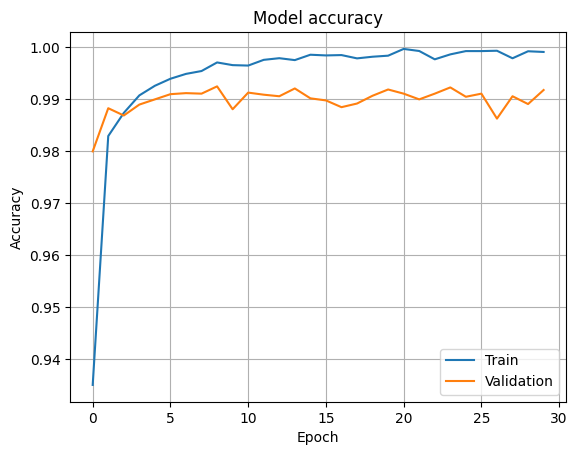

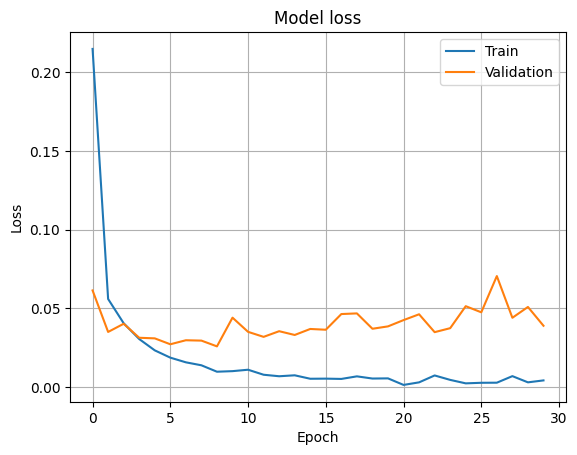

In [4]:
import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# RNN

In [5]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

tf.compat.v1.set_random_seed(777)  # reproducibility

idx2char = ['h', 'i', 'e', 'l', 'o']
# Teach hello: hihell -> ihello
x_data = [[0, 1, 0, 2, 3, 3]]   # hihell
x_one_hot = np.array([[[1, 0, 0, 0, 0],   # h 0
                       [0, 1, 0, 0, 0],   # i 1
                       [1, 0, 0, 0, 0],   # h 0
                       [0, 0, 1, 0, 0],   # e 2
                       [0, 0, 0, 1, 0],   # l 3
                       [0, 0, 0, 1, 0]]])  # l 3

y_data = [[1, 0, 2, 3, 3, 4]]    # ihello

num_classes = 5
input_dim = 5  # one-hot size
hidden_size = 5  # output from the LSTM. 5 to directly predict one-hot
batch_size = 1   # one sentence
sequence_length = 6  # |ihello| == 6
learning_rate = 0.1

X = tf.placeholder(
    tf.float32, [None, sequence_length, input_dim])  # X one-hot
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label

# Define LSTM cell
cell = tf.compat.v1.nn.rnn_cell.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True, reuse=tf.compat.v1.AUTO_REUSE)

# Initialize cell state
initial_state = cell.zero_state(batch_size, tf.float32)

# Run dynamic RNN
outputs, _states = tf.compat.v1.nn.dynamic_rnn(
    cell, X, initial_state=initial_state, dtype=tf.float32)

# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
dense = tf.keras.layers.Dense(num_classes, activation=None)
outputs = dense(X_for_fc)

# Reshape output for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.keras.losses.sparse_categorical_crossentropy(
    y_true=Y, y_pred=outputs, from_logits=True)
loss = tf.reduce_mean(sequence_loss)
train = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    for i in range(50):
        l, _ = sess.run([loss, train], feed_dict={X: x_one_hot, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_one_hot})
        print(i, "loss:", l, "prediction: ", result, "true Y: ", y_data)

        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]
        print("\tPrediction str: ", ''.join(result_str))


Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\k8s\AppData\Local\Temp\ipykernel_1312\4088922680.py:31: UserWarning: `tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True, reuse=tf.compat.v1.AUTO_REUSE)


0 loss: 1.6075039 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
1 loss: 1.5085233 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
2 loss: 1.4093033 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
3 loss: 1.3171793 prediction:  [[3 3 3 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  lllllo
4 loss: 1.2236831 prediction:  [[3 3 3 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  lllllo
5 loss: 1.1050217 prediction:  [[1 3 3 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  illllo
6 loss: 0.9704117 prediction:  [[1 0 3 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihlllo
7 loss: 0.8194322 prediction:  [[1 0 3 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihlllo
8 loss: 0.68514854 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
9 loss: 0.57853156 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Pr

# LSTM

In [6]:
import tensorflow.compat.v1 as tf
import numpy as np

tf.disable_v2_behavior()
tf.set_random_seed(777)  # reproducibility

sample = "I am a boy. You're a girl."
idx2char = list(set(sample))  # index -> char
char2idx = {c: i for i, c in enumerate(idx2char)}  # char -> idex

# hyper parameters
dic_size = len(char2idx)  # RNN input size (one hot size)
hidden_size = len(char2idx)  # RNN output size
num_classes = len(char2idx)  # final output size (RNN or softmax, etc.)
batch_size = 1  # one sample data, one batch
sequence_length = len(sample) - 1  # number of lstm rollings (unit #)
learning_rate = 0.1

sample_idx = [char2idx[c] for c in sample]  # char to index
x_data = [sample_idx[:-1]]  # X data sample (0 ~ n-1) hello: hell
y_data = [sample_idx[1:]]   # Y label sample (1 ~ n) hello: ello

X = tf.placeholder(tf.int32, [None, sequence_length])  # X data
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label

x_one_hot = tf.one_hot(X, num_classes)  # one hot: 1 -> 0 1 0 0 0 0 0 0 0 0

# LSTM layer
lstm = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
outputs = lstm(x_one_hot)

# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
outputs = tf.keras.layers.Dense(num_classes, activation=None)(X_for_fc)
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.keras.losses.sparse_categorical_crossentropy(
    y_data, outputs, from_logits=True)
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        l, _ = sess.run([loss, train], feed_dict={X: x_data, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_data})

        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]

        print(i, "loss:", l, "Prediction:", ''.join(result_str))


0 loss: 2.7780056 Prediction:                          
1 loss: 2.537793 Prediction:                          
2 loss: 2.4559035 Prediction:         ....rrrrr    .r..
3 loss: 2.153276 Prediction:  a  a aoo...ourrr a a....
4 loss: 1.9309753 Prediction:  a  a aoo..oou'rr a a ...
5 loss: 1.6279148 Prediction:  a  a aoo. oou'rr a a ll.
6 loss: 1.3411411 Prediction:  a  a boo. ooy'r  a aill.
7 loss: 1.1050122 Prediction:  a  a aou.'rr''rr a airr.
8 loss: 1.2324615 Prediction:  a  a aoy. You're a airl.
9 loss: 0.72222763 Prediction:  a  a aoy. You're a girl.
10 loss: 0.6113104 Prediction:  a  a aoy. You're a girl.
11 loss: 0.522328 Prediction:  a  a boy. You're a girl.
12 loss: 0.40611264 Prediction:  a  a boy. You're a girl.
13 loss: 0.3112709 Prediction:  a  a boy. You're a girl.
14 loss: 0.25604975 Prediction:  a  a boy. You're a girl.
15 loss: 0.2084834 Prediction:  a  a boy. You're a girl.
16 loss: 0.16851464 Prediction:  a  a boy. You're a girl.
17 loss: 0.13938501 Prediction:  a  a bo